# Recurrent Neural Network

In [1]:
import pandas as pd
import os
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Configure Datasets

#### Pull in entire BTC price history (2015 - now)

In [2]:
df = pd.read_csv('../data/btc_price_history.csv')
display(df)

,date,open,high,low,close,volume
0,2015-02-09 00:00:00,224.220000,225.00,215.400000,220.610000,6.493501e+06
1,2015-02-10 00:00:00,220.610000,223.88,214.000000,220.960000,6.402351e+06
2,2015-02-11 00:00:00,220.960000,224.40,218.100000,219.190000,4.268987e+06
3,2015-02-12 00:00:00,219.190000,223.20,217.870000,222.600000,2.468883e+06
4,2015-02-13 00:00:00,222.390000,241.76,221.460000,236.000000,6.806973e+06
...,...,...,...,...,...,...
2563,2022-02-15 00:00:00,42567.000000,44762.00,42463.000000,44563.000000,1.833082e+08
2564,2022-02-16 00:00:00,44567.000000,44584.00,43352.000000,43909.000000,1.436487e+08
2565,2022-02-17 00:00:00,43896.945914,44189.00,40117.000000,40555.000000,2.738255e+08
2566,2022-02-18 00:00:00,40555.000000,40984.00,39521.000000,40027.477227,1.872117e+08


#### Clean DataFrame

Remove '00:00:00' values from date column of data set

In [3]:
df['date'] = df['date'].apply(lambda x: x.split(' ')[0])

display(df.tail(3))

,date,open,high,low,close,volume
2565,2022-02-17,43896.945914,44189.0,40117.000000,40555.000000,2.738255e+08
2566,2022-02-18,40555.000000,40984.0,39521.000000,40027.477227,1.872117e+08
2567,2022-02-19,40027.000000,40339.0,39972.645051,40187.000000,6.091353e+06


#### Split DataFrame into Training Set and Testing Set

70% of the 'open' data set row will be used to train the RNN.

'open' column is set by splice 1:2

In [4]:
train_set = df.head(int(len(df)*(0.70)))
train_set = train_set.iloc[:, 1:2].values

In [5]:
test_set = df.iloc[len(train_set):]
test_set = test_set.iloc[:, 1:2].values

#### Validate

In [6]:
print('Open price training array length:', len(train_set))
print('Open price testing array length:', len(test_set))
print('Combined length:', len(train_set) + len(test_set))
print('Total data set length:', len(df))

Open price training array length: 1797
Open price testing array length: 771
Combined length: 2568
Total data set length: 2568


## Transform Training Set Into Usable Values

#### Set number of previous days that will be used to predict the next day

In [7]:
prediction_days = 30

#### Scale training set into values between 0 and 1

In [8]:
sc = MinMaxScaler(feature_range=(0, 1))
train_set_scaled = sc.fit_transform(train_set)

#### Create X and Y training arrays that take in previous 30 days scaled 'open' price

In [9]:
X_train = []
Y_train = []
for i in range(prediction_days, len(train_set)):
    X_train.append(train_set_scaled[i - prediction_days:i, 0])
    Y_train.append(train_set_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Create the Keras Sequential Model

#### Initialize sequential model with layers

In [10]:
model = keras.models.Sequential([
        keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1), name="layer1"),
        keras.layers.Dropout(0.2),
        keras.layers.LSTM(units=50, return_sequences=True, name="layer2"),
        keras.layers.Dropout(0.2),
        keras.layers.LSTM(units=50, return_sequences=True, name="layer3"),
        keras.layers.Dropout(0.2),
        keras.layers.LSTM(units=50, name="layer4"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(units=1),
    ], name='BTC01')

2022-02-23 18:17:30.329505: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Compile and run RNN

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, Y_train, epochs=1000, batch_size=len(train_set))

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 0.0861
Epoch 2/1000
1/1 [==============================] - 0s 247ms/step - loss: 0.0672
Epoch 3/1000
1/1 [==============================] - 0s 247ms/step - loss: 0.0501
Epoch 4/1000
1/1 [==============================] - 0s 237ms/step - loss: 0.0340
Epoch 5/1000
1/1 [==============================] - 0s 235ms/step - loss: 0.0194
Epoch 6/1000
1/1 [==============================] - 0s 233ms/step - loss: 0.0127
Epoch 7/1000
1/1 [==============================] - 0s 236ms/step - loss: 0.0199
Epoch 8/1000
1/1 [==============================] - 0s 239ms/step - loss: 0.0231
Epoch 9/1000
1/1 [==============================] - 0s 244ms/step - loss: 0.0162
Epoch 10/1000
1/1 [==============================] - 0s 236ms/step - loss: 0.0102
Epoch 11/1000
1/1 [==============================] - 0s 235ms/step - loss: 0.0085
Epoch 12/1000
1/1 [==============================] - 0s 232ms/step - loss: 0.0097
Epoch 13/1000
1/1 [=========

1/1 [==============================] - 0s 234ms/step - loss: 0.0028
Epoch 102/1000
1/1 [==============================] - 0s 230ms/step - loss: 0.0030
Epoch 103/1000
1/1 [==============================] - 0s 237ms/step - loss: 0.0030
Epoch 104/1000
1/1 [==============================] - 0s 230ms/step - loss: 0.0028
Epoch 105/1000
1/1 [==============================] - 0s 236ms/step - loss: 0.0028
Epoch 106/1000
1/1 [==============================] - 0s 236ms/step - loss: 0.0028
Epoch 107/1000
1/1 [==============================] - 0s 236ms/step - loss: 0.0026
Epoch 108/1000
1/1 [==============================] - 0s 228ms/step - loss: 0.0029
Epoch 109/1000
1/1 [==============================] - 0s 234ms/step - loss: 0.0026
Epoch 110/1000
1/1 [==============================] - 0s 236ms/step - loss: 0.0027
Epoch 111/1000
1/1 [==============================] - 0s 231ms/step - loss: 0.0027
Epoch 112/1000
1/1 [==============================] - 0s 237ms/step - loss: 0.0029
Epoch 113/1000
1/1 

1/1 [==============================] - 0s 228ms/step - loss: 0.0022
Epoch 200/1000
1/1 [==============================] - 0s 227ms/step - loss: 0.0022
Epoch 201/1000
1/1 [==============================] - 0s 231ms/step - loss: 0.0020
Epoch 202/1000
1/1 [==============================] - 0s 229ms/step - loss: 0.0021
Epoch 203/1000
1/1 [==============================] - 0s 227ms/step - loss: 0.0021
Epoch 204/1000
1/1 [==============================] - 0s 230ms/step - loss: 0.0021
Epoch 205/1000
1/1 [==============================] - 0s 230ms/step - loss: 0.0022
Epoch 206/1000
1/1 [==============================] - 0s 230ms/step - loss: 0.0022
Epoch 207/1000
1/1 [==============================] - 0s 228ms/step - loss: 0.0021
Epoch 208/1000
1/1 [==============================] - 0s 227ms/step - loss: 0.0021
Epoch 209/1000
1/1 [==============================] - 0s 232ms/step - loss: 0.0023
Epoch 210/1000
1/1 [==============================] - 0s 230ms/step - loss: 0.0022
Epoch 211/1000
1/1 

1/1 [==============================] - 0s 228ms/step - loss: 0.0018
Epoch 298/1000
1/1 [==============================] - 0s 227ms/step - loss: 0.0018
Epoch 299/1000
1/1 [==============================] - 0s 227ms/step - loss: 0.0019
Epoch 300/1000
1/1 [==============================] - 0s 226ms/step - loss: 0.0017
Epoch 301/1000
1/1 [==============================] - 0s 228ms/step - loss: 0.0018
Epoch 302/1000
1/1 [==============================] - 0s 224ms/step - loss: 0.0017
Epoch 303/1000
1/1 [==============================] - 0s 227ms/step - loss: 0.0017
Epoch 304/1000
1/1 [==============================] - 0s 228ms/step - loss: 0.0019
Epoch 305/1000
1/1 [==============================] - 0s 230ms/step - loss: 0.0017
Epoch 306/1000
1/1 [==============================] - 0s 227ms/step - loss: 0.0018
Epoch 307/1000
1/1 [==============================] - 0s 227ms/step - loss: 0.0019
Epoch 308/1000
1/1 [==============================] - 0s 234ms/step - loss: 0.0019
Epoch 309/1000
1/1 

1/1 [==============================] - 0s 229ms/step - loss: 0.0015
Epoch 396/1000
1/1 [==============================] - 0s 228ms/step - loss: 0.0015
Epoch 397/1000
1/1 [==============================] - 0s 225ms/step - loss: 0.0015
Epoch 398/1000
1/1 [==============================] - 0s 229ms/step - loss: 0.0015
Epoch 399/1000
1/1 [==============================] - 0s 227ms/step - loss: 0.0015
Epoch 400/1000
1/1 [==============================] - 0s 226ms/step - loss: 0.0014
Epoch 401/1000
1/1 [==============================] - 0s 229ms/step - loss: 0.0015
Epoch 402/1000
1/1 [==============================] - 0s 228ms/step - loss: 0.0015
Epoch 403/1000
1/1 [==============================] - 0s 264ms/step - loss: 0.0015
Epoch 404/1000
1/1 [==============================] - 0s 250ms/step - loss: 0.0015
Epoch 405/1000
1/1 [==============================] - 0s 241ms/step - loss: 0.0014
Epoch 406/1000
1/1 [==============================] - 0s 229ms/step - loss: 0.0014
Epoch 407/1000
1/1 

1/1 [==============================] - 0s 227ms/step - loss: 0.0014
Epoch 494/1000
1/1 [==============================] - 0s 226ms/step - loss: 0.0015
Epoch 495/1000
1/1 [==============================] - 0s 231ms/step - loss: 0.0012
Epoch 496/1000
1/1 [==============================] - 0s 229ms/step - loss: 0.0014
Epoch 497/1000
1/1 [==============================] - 0s 228ms/step - loss: 0.0013
Epoch 498/1000
1/1 [==============================] - 0s 226ms/step - loss: 0.0014
Epoch 499/1000
1/1 [==============================] - 0s 231ms/step - loss: 0.0014
Epoch 500/1000
1/1 [==============================] - 0s 226ms/step - loss: 0.0014
Epoch 501/1000
1/1 [==============================] - 0s 226ms/step - loss: 0.0012
Epoch 502/1000
1/1 [==============================] - 0s 226ms/step - loss: 0.0015
Epoch 503/1000
1/1 [==============================] - 0s 229ms/step - loss: 0.0013
Epoch 504/1000
1/1 [==============================] - 0s 228ms/step - loss: 0.0015
Epoch 505/1000
1/1 

1/1 [==============================] - 0s 228ms/step - loss: 0.0011
Epoch 592/1000
1/1 [==============================] - 0s 225ms/step - loss: 0.0013
Epoch 593/1000
1/1 [==============================] - 0s 226ms/step - loss: 0.0012
Epoch 594/1000
1/1 [==============================] - 0s 227ms/step - loss: 0.0012
Epoch 595/1000
1/1 [==============================] - 0s 232ms/step - loss: 0.0012
Epoch 596/1000
1/1 [==============================] - 0s 227ms/step - loss: 0.0012
Epoch 597/1000
1/1 [==============================] - 0s 230ms/step - loss: 0.0012
Epoch 598/1000
1/1 [==============================] - 0s 228ms/step - loss: 0.0011
Epoch 599/1000
1/1 [==============================] - 0s 231ms/step - loss: 0.0012
Epoch 600/1000
1/1 [==============================] - 0s 227ms/step - loss: 0.0012
Epoch 601/1000
1/1 [==============================] - 0s 227ms/step - loss: 0.0012
Epoch 602/1000
1/1 [==============================] - 0s 232ms/step - loss: 0.0012
Epoch 603/1000
1/1 

1/1 [==============================] - 0s 226ms/step - loss: 0.0011
Epoch 690/1000
1/1 [==============================] - 0s 224ms/step - loss: 0.0011
Epoch 691/1000
1/1 [==============================] - 0s 224ms/step - loss: 0.0011
Epoch 692/1000
1/1 [==============================] - 0s 226ms/step - loss: 0.0011
Epoch 693/1000
1/1 [==============================] - 0s 226ms/step - loss: 0.0012
Epoch 694/1000
1/1 [==============================] - 0s 228ms/step - loss: 0.0011
Epoch 695/1000
1/1 [==============================] - 0s 225ms/step - loss: 0.0011
Epoch 696/1000
1/1 [==============================] - 0s 224ms/step - loss: 0.0011
Epoch 697/1000
1/1 [==============================] - 0s 226ms/step - loss: 0.0010
Epoch 698/1000
1/1 [==============================] - 0s 226ms/step - loss: 0.0010
Epoch 699/1000
1/1 [==============================] - 0s 225ms/step - loss: 0.0010
Epoch 700/1000
1/1 [==============================] - 0s 225ms/step - loss: 0.0011
Epoch 701/1000
1/1 

Epoch 787/1000
1/1 [==============================] - 0s 228ms/step - loss: 0.0010
Epoch 788/1000
1/1 [==============================] - 0s 227ms/step - loss: 0.0011
Epoch 789/1000
1/1 [==============================] - 0s 227ms/step - loss: 0.0011
Epoch 790/1000
1/1 [==============================] - 0s 228ms/step - loss: 8.9375e-04
Epoch 791/1000
1/1 [==============================] - 0s 225ms/step - loss: 9.8673e-04
Epoch 792/1000
1/1 [==============================] - 0s 230ms/step - loss: 0.0010
Epoch 793/1000
1/1 [==============================] - 0s 225ms/step - loss: 9.4379e-04
Epoch 794/1000
1/1 [==============================] - 0s 227ms/step - loss: 0.0011
Epoch 795/1000
1/1 [==============================] - 0s 230ms/step - loss: 0.0010
Epoch 796/1000
1/1 [==============================] - 0s 232ms/step - loss: 0.0011
Epoch 797/1000
1/1 [==============================] - 0s 231ms/step - loss: 9.4822e-04
Epoch 798/1000
1/1 [==============================] - 0s 230ms/step - l

1/1 [==============================] - 0s 227ms/step - loss: 9.5251e-04
Epoch 883/1000
1/1 [==============================] - 0s 225ms/step - loss: 8.9772e-04
Epoch 884/1000
1/1 [==============================] - 0s 226ms/step - loss: 9.5039e-04
Epoch 885/1000
1/1 [==============================] - 0s 227ms/step - loss: 8.3872e-04
Epoch 886/1000
1/1 [==============================] - 0s 224ms/step - loss: 9.4126e-04
Epoch 887/1000
1/1 [==============================] - 0s 227ms/step - loss: 8.5753e-04
Epoch 888/1000
1/1 [==============================] - 0s 229ms/step - loss: 9.8598e-04
Epoch 889/1000
1/1 [==============================] - 0s 233ms/step - loss: 9.4923e-04
Epoch 890/1000
1/1 [==============================] - 0s 227ms/step - loss: 9.2440e-04
Epoch 891/1000
1/1 [==============================] - 0s 229ms/step - loss: 0.0010
Epoch 892/1000
1/1 [==============================] - 0s 227ms/step - loss: 8.5300e-04
Epoch 893/1000
1/1 [==============================] - 0s 227ms

1/1 [==============================] - 0s 227ms/step - loss: 8.5621e-04
Epoch 977/1000
1/1 [==============================] - 0s 228ms/step - loss: 9.0553e-04
Epoch 978/1000
1/1 [==============================] - 0s 226ms/step - loss: 8.5873e-04
Epoch 979/1000
1/1 [==============================] - 0s 227ms/step - loss: 9.4792e-04
Epoch 980/1000
1/1 [==============================] - 0s 227ms/step - loss: 9.4883e-04
Epoch 981/1000
1/1 [==============================] - 0s 227ms/step - loss: 8.6085e-04
Epoch 982/1000
1/1 [==============================] - 0s 226ms/step - loss: 9.3715e-04
Epoch 983/1000
1/1 [==============================] - 0s 225ms/step - loss: 8.0805e-04
Epoch 984/1000
1/1 [==============================] - 0s 225ms/step - loss: 9.3053e-04
Epoch 985/1000
1/1 [==============================] - 0s 225ms/step - loss: 8.3713e-04
Epoch 986/1000
1/1 [==============================] - 0s 227ms/step - loss: 8.2891e-04
Epoch 987/1000
1/1 [==============================] - 0s 2

In [15]:
print(model.summary())

Model: "BTC01"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (LSTM)               (None, 30, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 30, 50)            0         
                                                                 
 layer2 (LSTM)               (None, 30, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 30, 50)            0         
                                                                 
 layer3 (LSTM)               (None, 30, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 30, 50)            0         
                                                                 
 layer4 (LSTM)               (None, 50)                20200 

### Run RNN on Test Data Set

In [12]:
real_price = test_set

dataset_total = df['open']
inputs = dataset_total[len(dataset_total) - len(test_set) - prediction_days:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(prediction_days, len(test_set) + prediction_days):
    X_test.append(inputs[i - prediction_days:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_price = model.predict(X_test)
predicted_price = sc.inverse_transform(predicted_price)

### Plot Data

#### Side by side

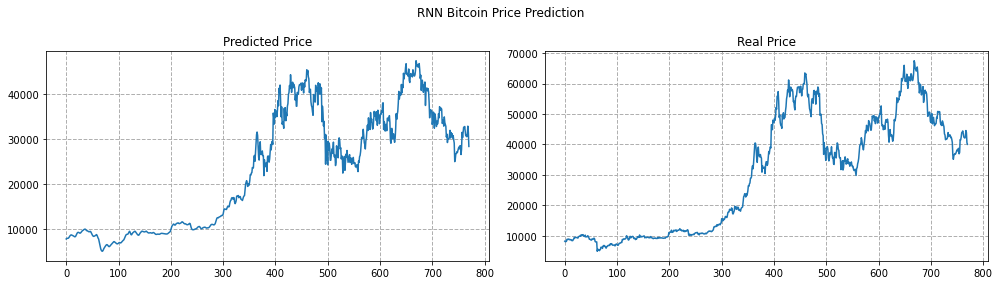

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
axes[0].plot(predicted_price)
axes[0].title.set_text('Predicted Price')
axes[0].grid(linestyle='--', linewidth="1")

axes[1].plot(real_price)
axes[1].title.set_text('Real Price')
axes[1].grid(linestyle='--', linewidth="1")

fig.suptitle('RNN Bitcoin Price Prediction')
fig.tight_layout()

#### Overlay

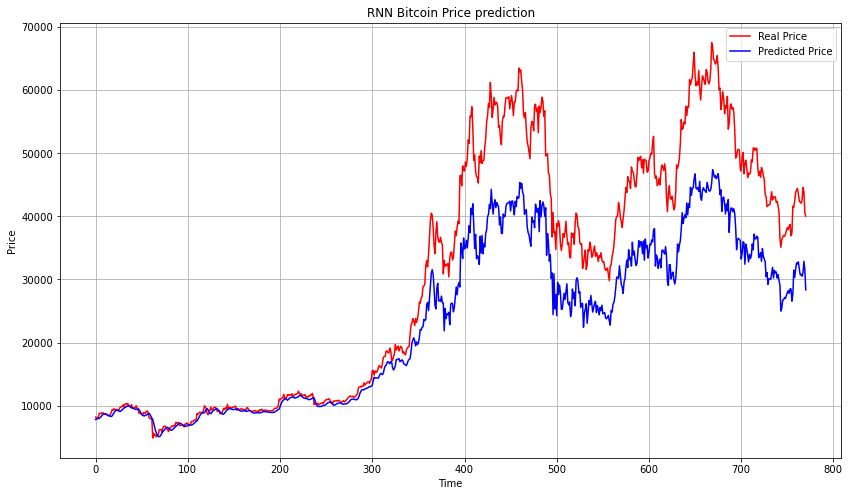

In [14]:
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(8)

plt.plot(real_price, color='red', label='Real Price')
plt.plot(predicted_price, color='blue', label='Predicted Price')
plt.title('RNN Bitcoin Price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid()
plt.legend()
plt.show()